This stock analysis can help an investor to make a decision on what stocks to purchase which may provide give high returns and low investment risk.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
stocks_data=pd.read_csv('/content/gdrive/My Drive/all_stocks_5yr.csv')
companies_list = stocks_data.groupby(['Name']).sum()
companies_list
stocks_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [ ]:
# Lambda functions to get Year, Month, and Day information into our Dataset
stocks_data['Year']= stocks_data['date'].map(lambda x: x.split("/")[2] if len(x.split("/"))>2 else x.split("-")[0])
stocks_data['Month']= stocks_data['date'].map(lambda x: x.split("/")[0] if len(x.split("/"))>2 else x.split("-")[1])
stocks_data['Day']= stocks_data['date'].map(lambda x: x.split("/")[1] if len(x.split("/"))>2 else '01')

In [ ]:
stocks_data.head()

,date,open,high,low,close,volume,Name,Year,Month,Day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,02,01
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,02,01
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,02,01
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,02,01
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,02,01


In [ ]:
stocks_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
Year       object
Month      object
Day        object
dtype: object

In [ ]:
first_date_list = [stocks_data.query("Year == '{}'".format(2013+i)).date.min() for i in range(8)]
last_date_list = [stocks_data.query("Year == '{}'".format(2013+i)).date.max() for i in range(8)]
print(first_date_list)
first_date_df =pd.DataFrame({"date": first_date_list}) 
last_date_df = pd.DataFrame({"date": last_date_list})

first_date_df.head()

['2013-02-08', '2014-01-02', '2015-01-02', '2016-01-04', '2017-01-03', '2018-01-02', nan, nan]


,date
0,2013-02-08
1,2014-01-02
2,2015-01-02
3,2016-01-04
4,2017-01-03


In [ ]:
# filtering for the first day data in `Stock data`
first_date_df = (
    stocks_data
    .merge(first_date_df, on='date', how='inner')
    .pipe(lambda x: x.assign(Year=x.date.str[:4]))
    .rename(columns={"open": "open_first_day"})
    .reset_index(drop=True)

    [['Name', 'Year', 'open_first_day']]
    .pivot_table(values='open_first_day', columns='Year', index='Name', aggfunc='sum')
    .rename_axis(None, axis=1)
    .reset_index()
)

In [ ]:

# filtering for the last day data in `Stock data`


last_date_df = (
    stocks_data
    .merge(last_date_df, on='date', how='inner')
    .pipe(lambda x: x.assign(year=x.date.str[:4]))
    .rename(columns={"close": "close_last_day"})
    .reset_index(drop=True)
    [['Name', 'Year', 'close_last_day']]
    .pivot_table(values='close_last_day', columns='Year', index='Name', aggfunc='sum')
    .rename_axis(None, axis=1)
    .reset_index()
)

In [ ]:

first_date_df.head()

,Name,2013,2014,2015,2016,2017,2018
0,A,45.0700,57.1000,41.18,41.06,45.93,67.42
1,AAL,15.0700,25.0700,54.28,41.29,47.28,52.33
2,AAP,78.3400,110.3600,160.85,149.25,170.78,100.90
3,AAPL,67.7142,79.3828,111.39,102.61,115.80,170.16
4,ABBV,36.3700,52.1200,65.62,58.06,62.92,97.14


In [ ]:
# merging 2012-2017 data with 2018 data
agg_first_date_df = (
    first_date_df
    # .merge(first_date_2018_df, on='ticker', how='inner')
    # .rename(columns=({2018: "2018"}))
    .melt(id_vars='Name', value_vars=['2013', '2014', '2015', '2016', '2017'])
    .rename(columns={"variable": "Year", "value": "open_first_day"})
)

agg_last_date_df = (
    last_date_df
    # .merge(last_date_2018_df, on='ticker', how='inner')
    # .rename(columns=({2018: "2018"}))
    .melt(id_vars='Name', value_vars=['2013', '2014', '2015', '2016', '2017'])
    .rename(columns={"variable": "Year", "value": "close_last_day"})
)

In [ ]:

agg_first_date_df.head()

,Name,Year,open_first_day
0,A,2013,45.0700
1,AAL,2013,15.0700
2,AAP,2013,78.3400
3,AAPL,2013,67.7142
4,ABBV,2013,36.3700


In [ ]:
# calculating yearly return and then averaging them to get average yearly returns for each stock
agg_gains_df = (
    agg_first_date_df
    .merge(agg_last_date_df, on=['Name', 'Year'], how='inner')
    .pipe(lambda x: x.assign(gains_dollar=x.close_last_day-x.open_first_day))
    .pipe(lambda x: x.assign(gains_pctg=x.gains_dollar/x.open_first_day))
    .groupby("Name")
    .agg({"gains_pctg": "mean"})
    .reset_index()
    .rename(columns={"gains_pctg": "avg_yearly_returns"})
)

# calculating overall variance using each year's return
agg_var_df = (
    agg_first_date_df
    .merge(agg_last_date_df, on=['Name', 'Year'], how='inner')
    .pipe(lambda x: x.assign(gains_dollar=x.close_last_day-x.open_first_day))
    .pipe(lambda x: x.assign(gains_pctg=x.gains_dollar/x.open_first_day))
    [['Name', 'gains_pctg']]
    .groupby("Name")
    .agg(np.var)
    .reset_index()
    .rename(columns={"gains_pctg": "yearly_variance"})
)

agg_df3 = (
    agg_gains_df
    .merge(agg_var_df, on='Name', how='inner')
)

Aggregated data with annual returns and annual variance

In [ ]:

agg_df3.head()
display(agg_df3.shape)

(505, 3)

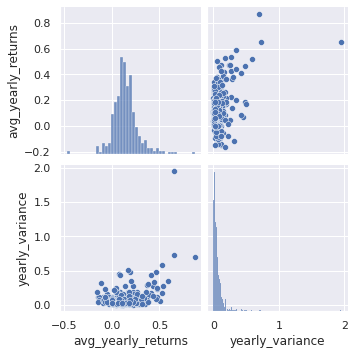

In [ ]:

sns.pairplot(agg_df3)

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# clean na data before clustering
agg_df3['avg_yearly_returns'] = agg_df3['avg_yearly_returns'].fillna(0)
agg_df3['yearly_variance'] = agg_df3['yearly_variance'].fillna(0)

Elbow Curve

In [ ]:
data = agg_df3.drop('Name', axis =1)

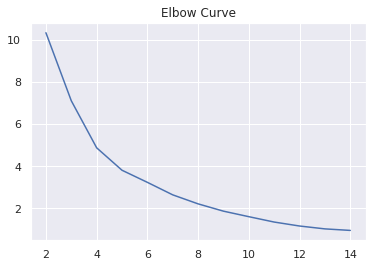

In [ ]:
X =  data.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

Silhouette score and graph

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

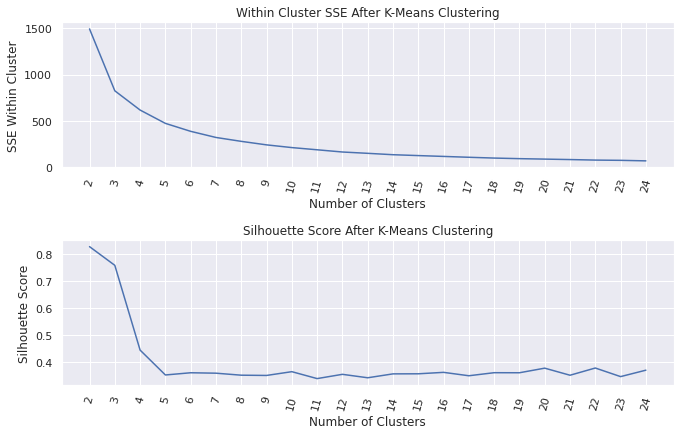

In [ ]:
plot_cluster(agg_df3, max_loop=25)

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [ ]:
first_trial = apply_cluster(agg_df3, clusters=14)

clustering performance
-----------------------------------
silhouette score: 0.36
sse withing cluster: 131.0


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)

cluster_perf_df
#display(cluster_perf_df.shape)

,cluster,avg_yearly_returns,yearly_variance,Name
0,13,-0.469310,0.000000,2
1,8,-0.078623,0.094393,21
2,0,0.032983,0.025638,87
3,9,0.041316,0.240492,8
4,5,0.078714,0.079080,61
5,11,0.133791,0.022831,139
6,10,0.170996,0.147294,27
7,3,0.206523,0.070835,54
8,7,0.228278,0.445229,7
9,6,0.239960,0.025699,65


K-Means Clustering with Tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import tensorflow as tf

In [ ]:
data_src= agg_df3
Stock_names = data_src.Name.values

# Dropping stock_name from data to plot
data_to_fit = data_src.copy().drop('Name', axis=1)

# Getting data as values for clustering algorithms
data_to_fit = data_to_fit.values
print (data_to_fit)

[[ 0.11377711  0.07744383  5.        ]
 [ 0.36523715  0.29065796  2.        ]
 [ 0.10173495  0.12757388 10.        ]
 ...
 [ 0.10944225  0.0215206  11.        ]
 [ 0.18701551  0.07543519  3.        ]
 [ 0.18292008  0.02021669 11.        ]]


In [ ]:
points = data_to_fit

def input_fn():
  return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)
  

#number of clusters
num_clusters = 4
num_iterations = 20


#kmeans = tf.estimator.experimental.KMeans(num_clusters=num_clusters, use_mini_batch=False)
kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=num_clusters, use_mini_batch=False)


# training model
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  previous_centers = cluster_centers

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp63mtkq73', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.

In [ ]:
# map the input points to their clusters and centers
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('centers',center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp63mtkq73/model.ckpt-39
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
centers [0.17678235 0.08554629 5.5588236 ]
centers [0.12243226 0.06876884 1.1933334 ]
centers [0.05886279 0.1407701  9.107142  ]
centers [0.17678235 0.08554629 5.5588236 ]
centers [0.12243226 0.06876884 1.1933334 ]
centers [0.12243226 0.06876884 1.1933334 ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [0.17678235 0.08554629 5.5588236 ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [0.05886279 0.1407701  9.107142  ]
centers [0.17678235 0.08554629 5.5588236 ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [ 0.15904783  0.03443953 11.15951   ]
centers [0.17678235 0.085

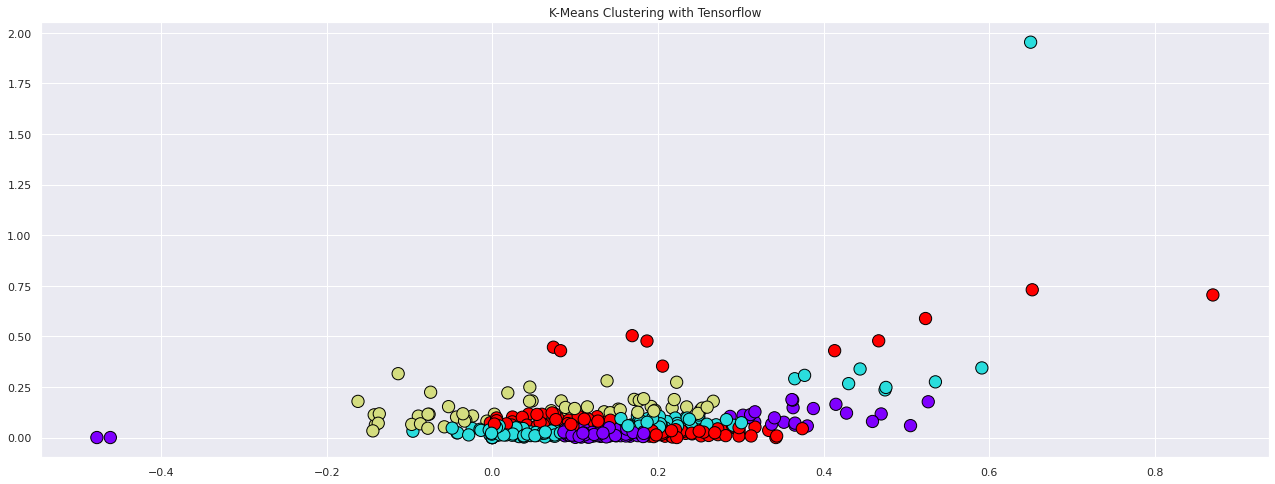

In [ ]:
plt.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = cluster_indices, cmap ="rainbow")
plt.title('K-Means Clustering with Tensorflow') 
plt.gcf().set_size_inches(22,8)
plt.show()